In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA

In [2]:

#fichier 1
file_name = "./output/20221030-124915.hdf5"

In [10]:
df_eda = pd.read_hdf(file_name, "/raw")
df_events = pd.read_hdf(file_name, "/events")
df_phasic = pd.read_hdf(file_name, "/phasic")
df_tonic = pd.read_hdf(file_name, "/tonic")
df_peaks = pd.read_hdf(file_name, "/peaks")

<AxesSubplot: >

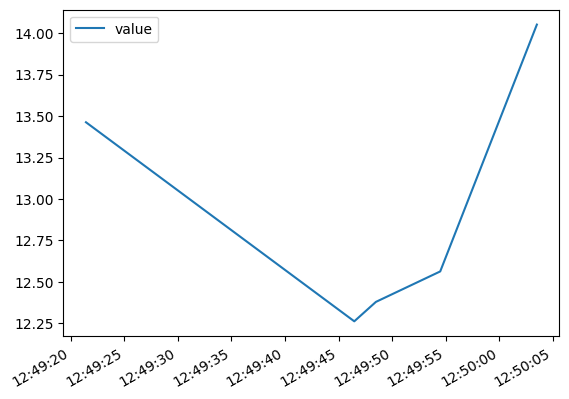

In [11]:
df_peaks.plot()

<AxesSubplot: >

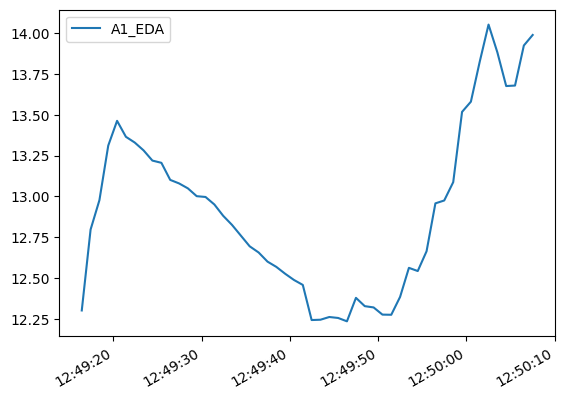

In [8]:
df_tonic.plot()

<AxesSubplot: >

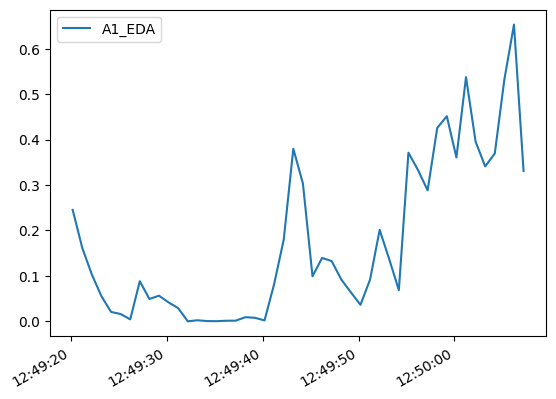

In [7]:
df_phasic.plot()

<AxesSubplot: >

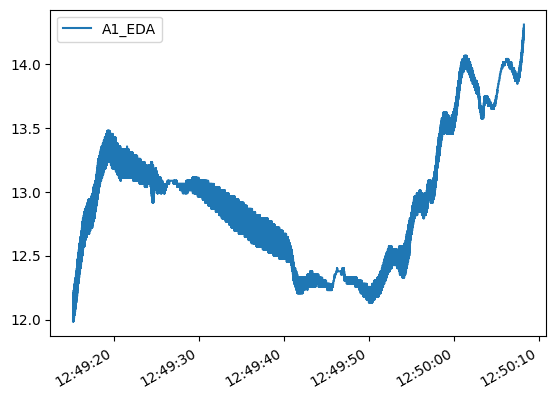

In [4]:
df_eda.plot()

In [6]:
df_events

,label,data
2022-10-30 12:49:21.886699951,start_game,NaN
2022-10-30 12:49:30.681800049,jump_scare,NaN


In [5]:
baseline_starts, baseline_stops, baseline_starts2, baseline_stops2, baseline_starts3, baseline_stops3 = list(df_events[df_events.data == '"baseline"'].index)
calm_starts, calm_stops = list(df_events[df_events.data == '"calme"'].index)
stress_starts, stress_stops = list(df_events[df_events.data == '"stress"'].index)

In [6]:
baseline_stops2

Timestamp('2022-10-29 18:52:48.865399902')

<AxesSubplot: >

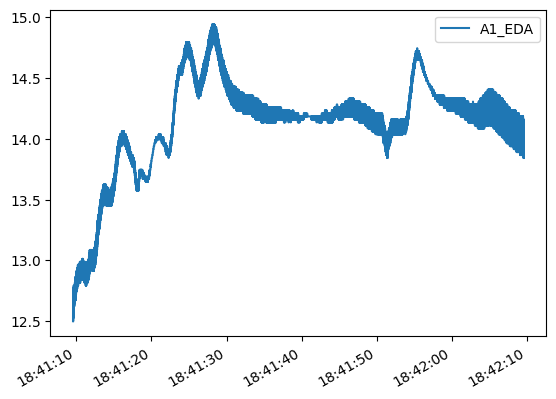

In [7]:
df_eda[baseline_starts:baseline_stops].plot()

<AxesSubplot: >

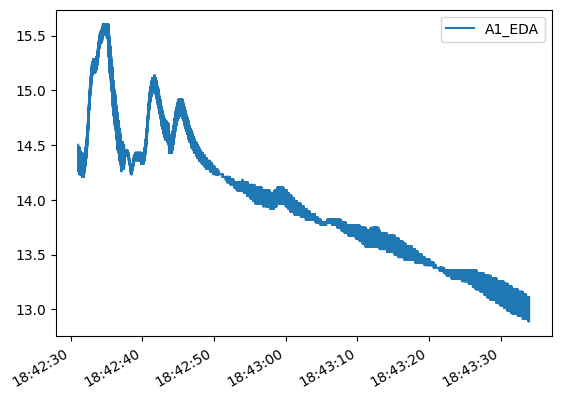

In [8]:
df_eda[calm_starts:calm_stops].plot()

<AxesSubplot: >

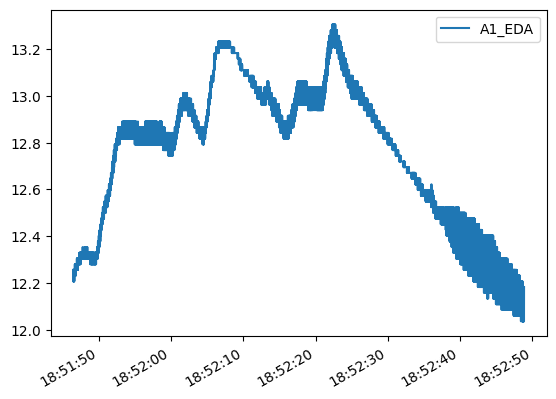

In [9]:
df_eda[baseline_starts2:baseline_stops2].plot()

<AxesSubplot: >

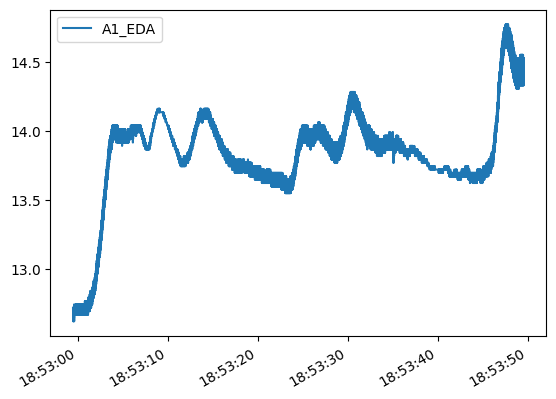

In [10]:
df_eda[stress_starts:stress_stops].plot()

<AxesSubplot: >

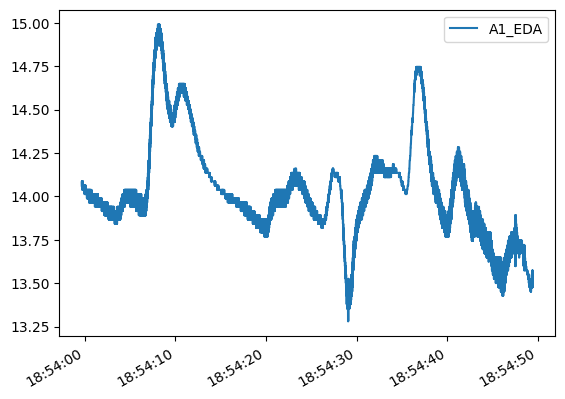

In [11]:
df_eda[baseline_starts3:baseline_stops3].plot()

----

In [12]:
df_eda

,A1_EDA
2022-10-29 18:40:30.059335,11.987305
2022-10-29 18:40:30.069335,12.207031
2022-10-29 18:40:30.079335,11.987305
2022-10-29 18:40:30.089335,12.207031
2022-10-29 18:40:30.099335,11.987305
...,...
2022-10-29 18:57:05.680551,12.670898
2022-10-29 18:57:05.690551,12.573242
2022-10-29 18:57:05.700551,12.670898
2022-10-29 18:57:05.710551,12.573242


In [13]:
from pyEDA.main import *

m, wd, eda_clean = process_statistical(df_eda[baseline_starts:baseline_stops], use_scipy=True, sample_rate=128, new_sample_rate=40, segment_width=60, segment_overlap=0)


/home/gigachad/miniconda3/envs/timeflux/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.8746e+05 -1.8745e+05  3e+03  5e+01  5e-01
 1: -1.8746e+05 -1.8765e+05  2e+02  4e+00  4e-02
 2: -1.8747e+05 -1.8751e+05  5e+01  8e-01  8e-03
 3: -1.8747e+05 -1.8748e+05  1e+01  2e-01  2e-03
 4: -1.8747e+05 -1.8747e+05  2e+00  2e-03  2e-05
 5: -1.8747e+05 -1.8747e+05  1e+00  7e-04  6e-06
 6: -1.8747e+05 -1.8747e+05  7e-01  4e-04  3e-06
 7: -1.8747e+05 -1.8747e+05  2e-01  1e-04  1e-06
 8: -1.8747e+05 -1.8747e+05  1e-01  6e-05  5e-07
 9: -1.8747e+05 -1.8747e+05  7e-02  3e-05  3e-07
10: -1.8747e+05 -1.8747e+05  3e-02  1e-05  1e-07
11: -1.8747e+05 -1.8747e+05  1e-02  3e-06  3e-08
12: -1.8747e+05 -1.8747e+05  3e-03  4e-07  4e-09
13: -1.8747e+05 -1.8747e+05  2e-03  2e-07  1e-09
14: -1.8747e+05 -1.8747e+05  5e-04  3e-08  3e-10
15: -1.8747e+05 -1.8747e+05  3e-04  1e-08

In [14]:
m

{'segment_indices': [(0, 1877)],
 'number_of_peaks': [4],
 'mean_gsr': [14.128082554902157],
 'max_of_peaks': [14.44493674621928]}

In [15]:
wd

{'segment_indices': [(0, 1877)],
 'filtered_phasic_gsr': [array([0.02142672, 0.02375687, 0.02613094, ..., 0.36970447, 0.36970406,
         0.36970373])],
 'phasic_gsr': [array([ 0.        ,  0.        , -0.12074249, ...,  0.1235629 ,
          0.12206945,  0.12059311])],
 'tonic_gsr': [array([12.81573203, 12.81577876, 12.81582661, ..., 13.91170637,
         13.91267623, 13.91364691])],
 'peaklist': [[13.781717435710219,
   14.44493674621928,
   14.243405150554333,
   14.369602877345363]],
 'indexlist': [array([ 255,  514, 1142, 1502])]}

In [16]:
eda_clean

[array([13.0994192 , 12.5321695 , 12.71735687, ..., 14.05571084,
        13.94488956, 14.10301874])]

<AxesSubplot: >

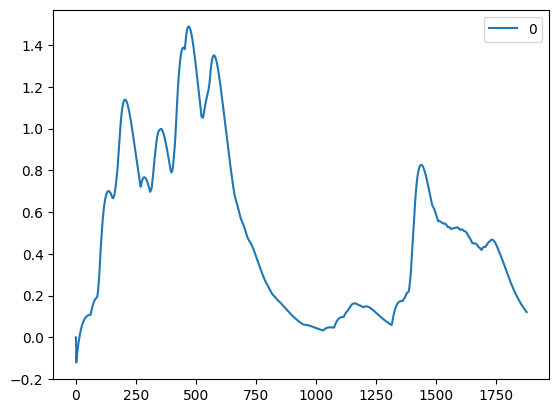

In [17]:
pd.DataFrame(wd['phasic_gsr'][0]).plot()


If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.9200e+05 -1.9199e+05  3e+03  5e+01  5e-01
 1: -1.9200e+05 -1.9224e+05  3e+02  5e+00  5e-02
 2: -1.9201e+05 -1.9207e+05  6e+01  9e-01  8e-03
 3: -1.9201e+05 -1.9202e+05  1e+01  1e-01  1e-03
 4: -1.9201e+05 -1.9202e+05  2e+00  2e-03  1e-05
 5: -1.9201e+05 -1.9201e+05  3e-01  2e-04  2e-06
 6: -1.9201e+05 -1.9201e+05  1e-01  4e-05  4e-07
 7: -1.9201e+05 -1.9201e+05  3e-02  8e-06  7e-08
 8: -1.9201e+05 -1.9201e+05  2e-02  5e-06  5e-08
 9: -1.9201e+05 -1.9201e+05  9e-03  2e-06  1e-08
10: -1.9201e+05 -1.9201e+05  4e-03  5e-07  5e-09
11: -1.9201e+05 -1.9201e+05  2e-03  2e-07  1e-09
12: -1.9201e+05 -1.9201e+05  4e-04  2e-08  2e-10
13: -1.9201e+05 -1.9201e+05  2e-04  4e-09  3e-11
14: -1.9201e+05 -1.9201e+05  6e-05  9e-10  8e-12
Optimal solution found.


<AxesSubplot: >

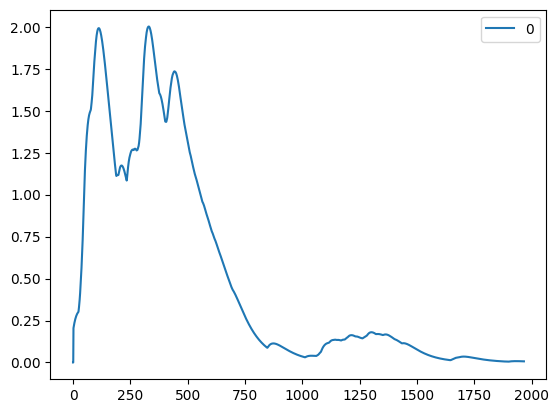

In [18]:
m, wd, eda_clean = process_statistical(df_eda[calm_starts:calm_stops], use_scipy=True, sample_rate=128, new_sample_rate=40, segment_width=60, segment_overlap=0)
pd.DataFrame(wd['phasic_gsr'][0]).plot()

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.5890e+05 -1.5889e+05  2e+03  5e+01  5e-01
 1: -1.5890e+05 -1.5903e+05  1e+02  3e+00  3e-02
 2: -1.5890e+05 -1.5891e+05  1e+01  2e-01  2e-03
 3: -1.5890e+05 -1.5890e+05  1e+00  3e-03  3e-05
 4: -1.5890e+05 -1.5890e+05  3e-01  5e-04  5e-06
 5: -1.5890e+05 -1.5890e+05  7e-02  5e-05  5e-07
 6: -1.5890e+05 -1.5890e+05  2e-02  2e-06  2e-08
 7: -1.5890e+05 -1.5890e+05  1e-02  5e-07  5e-09
 8: -1.5890e+05 -1.5890e+05  3e-03  1e-07  1e-09
 9: -1.5890e+05 -1.5890e+05  2e-03  8e-08  8e-10
10: -1.5890e+05 -1.5890e+05  8e-04  2e-08  2e-10
11: -1.5890e+05 -1.5890e+05  3e-04  4e-09  4e-11
12: -1.5890e+05 -1.5890e+05  8e-05  6e-10  6e-12
Optimal solution found.


<AxesSubplot: >

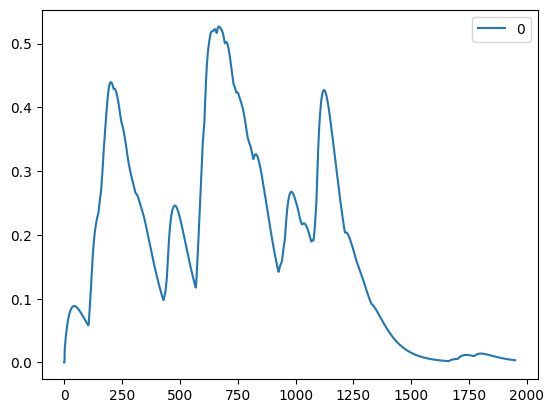

In [19]:
m, wd, eda_clean = process_statistical(df_eda[baseline_starts2:baseline_stops2], use_scipy=True, sample_rate=128, new_sample_rate=40, segment_width=60, segment_overlap=0)
pd.DataFrame(wd['phasic_gsr'][0]).plot()

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.4978e+05 -1.4977e+05  2e+03  4e+01  6e-01
 1: -1.4979e+05 -1.4997e+05  2e+02  4e+00  6e-02
 2: -1.4979e+05 -1.4983e+05  4e+01  7e-01  9e-03
 3: -1.4979e+05 -1.4980e+05  7e+00  9e-02  1e-03
 4: -1.4979e+05 -1.4980e+05  1e+00  9e-04  1e-05
 5: -1.4980e+05 -1.4980e+05  3e-01  2e-04  2e-06
 6: -1.4980e+05 -1.4980e+05  1e-01  4e-05  5e-07
 7: -1.4980e+05 -1.4980e+05  4e-02  2e-06  2e-08
 8: -1.4980e+05 -1.4980e+05  9e-03  2e-07  3e-09
 9: -1.4980e+05 -1.4980e+05  6e-03  1e-07  1e-09
10: -1.4980e+05 -1.4980e+05  2e-03  2e-08  3e-10
11: -1.4980e+05 -1.4980e+05  1e-03  1e-08  2e-10
12: -1.4980e+05 -1.4980e+05  3e-04  3e-09  4e-11
13: -1.4980e+05 -1.4980e+05  7e-05  2e-10  3e-12
Optimal solution found.


<AxesSubplot: >

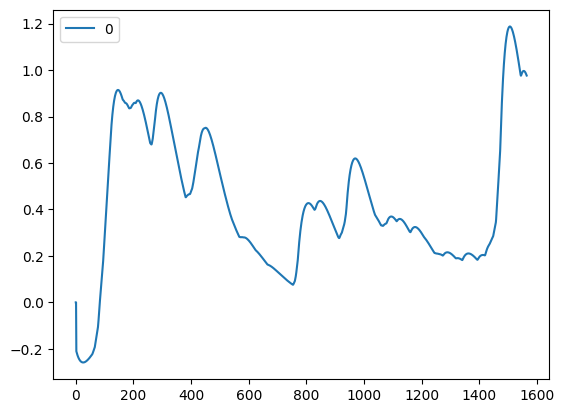

In [20]:
m, wd, eda_clean = process_statistical(df_eda[stress_starts:stress_stops], use_scipy=True, sample_rate=128, new_sample_rate=40, segment_width=60, segment_overlap=0)
pd.DataFrame(wd['phasic_gsr'][0]).plot()

If you are using this tool for your research please cite this paper: "pyEDA: An Open-Source Python Toolkit for Pre-processing and Feature Extraction of Electrodermal Activity"
     pcost       dcost       gap    pres   dres
 0: -1.5312e+05 -1.5311e+05  2e+03  4e+01  6e-01
 1: -1.5312e+05 -1.5335e+05  3e+02  6e+00  7e-02
 2: -1.5313e+05 -1.5319e+05  7e+01  1e+00  2e-02
 3: -1.5313e+05 -1.5315e+05  2e+01  2e-01  3e-03
 4: -1.5313e+05 -1.5314e+05  3e+00  2e-02  2e-04
 5: -1.5313e+05 -1.5314e+05  6e-01  2e-03  3e-05
 6: -1.5314e+05 -1.5314e+05  3e-01  9e-04  1e-05
 7: -1.5314e+05 -1.5314e+05  7e-02  2e-04  3e-06
 8: -1.5314e+05 -1.5314e+05  2e-02  3e-05  4e-07
 9: -1.5314e+05 -1.5314e+05  1e-02  1e-05  2e-07
10: -1.5314e+05 -1.5314e+05  3e-03  2e-06  3e-08
11: -1.5314e+05 -1.5314e+05  2e-03  1e-06  2e-08
12: -1.5314e+05 -1.5314e+05  6e-04  3e-07  4e-09
13: -1.5314e+05 -1.5314e+05  5e-04  2e-07  3e-09
14: -1.5314e+05 -1.5314e+05  1e-04  3e-08  4e-10
Optimal solution found.


<AxesSubplot: >

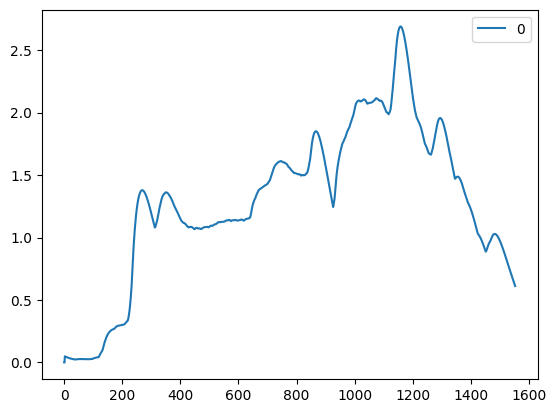

In [21]:
m, wd, eda_clean = process_statistical(df_eda[baseline_starts3:baseline_stops3], use_scipy=True, sample_rate=128, new_sample_rate=40, segment_width=60, segment_overlap=0)
pd.DataFrame(wd['phasic_gsr'][0]).plot()

In [22]:
import numpy as np
import cvxopt as cv
import cvxopt.solvers

def cvxEDA(y, delta, tau0=2., tau1=0.7, delta_knot=10., alpha=8e-4, gamma=1e-2,
           solver=None, options={'reltol':1e-9}):
    """CVXEDA Convex optimization approach to electrodermal activity processing

    This function implements the cvxEDA algorithm described in "cvxEDA: a
    Convex Optimization Approach to Electrodermal Activity Processing"
    (http://dx.doi.org/10.1109/TBME.2015.2474131, also available from the
    authors' homepages).

    Arguments:
       y: observed EDA signal (we recommend normalizing it: y = zscore(y))
       delta: sampling interval (in seconds) of y
       tau0: slow time constant of the Bateman function
       tau1: fast time constant of the Bateman function
       delta_knot: time between knots of the tonic spline function
       alpha: penalization for the sparse SMNA driver
       gamma: penalization for the tonic spline coefficients
       solver: sparse QP solver to be used, see cvxopt.solvers.qp
       options: solver options, see:
                http://cvxopt.org/userguide/coneprog.html#algorithm-parameters

    Returns (see paper for details):
       r: phasic component
       p: sparse SMNA driver of phasic component
       t: tonic component
       l: coefficients of tonic spline
       d: offset and slope of the linear drift term
       e: model residuals
       obj: value of objective function being minimized (eq 15 of paper)
    """

    n = len(y)
    y = cv.matrix(y)

    # bateman ARMA model
    a1 = 1./min(tau1, tau0) # a1 > a0
    a0 = 1./max(tau1, tau0)
    ar = np.array([(a1*delta + 2.) * (a0*delta + 2.), 2.*a1*a0*delta**2 - 8.,
        (a1*delta - 2.) * (a0*delta - 2.)]) / ((a1 - a0) * delta**2)
    ma = np.array([1., 2., 1.])

    # matrices for ARMA model
    i = np.arange(2, n)
    A = cv.spmatrix(np.tile(ar, (n-2,1)), np.c_[i,i,i], np.c_[i,i-1,i-2], (n,n))
    M = cv.spmatrix(np.tile(ma, (n-2,1)), np.c_[i,i,i], np.c_[i,i-1,i-2], (n,n))

    # spline
    delta_knot_s = int(round(delta_knot / delta))
    spl = np.r_[np.arange(1.,delta_knot_s), np.arange(delta_knot_s, 0., -1.)] # order 1
    spl = np.convolve(spl, spl, 'full')
    spl /= max(spl)
    # matrix of spline regressors
    i = np.c_[np.arange(-(len(spl)//2), (len(spl)+1)//2)] + np.r_[np.arange(0, n, delta_knot_s)]
    nB = i.shape[1]
    j = np.tile(np.arange(nB), (len(spl),1))
    p = np.tile(spl, (nB,1)).T
    valid = (i >= 0) & (i < n)
    B = cv.spmatrix(p[valid], i[valid], j[valid])

    # trend
    C = cv.matrix(np.c_[np.ones(n), np.arange(1., n+1.)/n])
    nC = C.size[1]

    # Solve the problem:
    # .5*(M*q + B*l + C*d - y)^2 + alpha*sum(A,1)*p + .5*gamma*l'*l
    # s.t. A*q >= 0

    old_options = cv.solvers.options.copy()
    cv.solvers.options.clear()
    cv.solvers.options.update(options)
    if solver == 'conelp':
        # Use conelp
        z = lambda m,n: cv.spmatrix([],[],[],(m,n))
        G = cv.sparse([[-A,z(2,n),M,z(nB+2,n)],[z(n+2,nC),C,z(nB+2,nC)],
                    [z(n,1),-1,1,z(n+nB+2,1)],[z(2*n+2,1),-1,1,z(nB,1)],
                    [z(n+2,nB),B,z(2,nB),cv.spmatrix(1.0, range(nB), range(nB))]])
        h = cv.matrix([z(n,1),.5,.5,y,.5,.5,z(nB,1)])
        c = cv.matrix([(cv.matrix(alpha, (1,n)) * A).T,z(nC,1),1,gamma,z(nB,1)])
        res = cv.solvers.conelp(c, G, h, dims={'l':n,'q':[n+2,nB+2],'s':[]})
        obj = res['primal objective']
    else:
        # Use qp
        Mt, Ct, Bt = M.T, C.T, B.T
        H = cv.sparse([[Mt*M, Ct*M, Bt*M], [Mt*C, Ct*C, Bt*C],
                    [Mt*B, Ct*B, Bt*B+gamma*cv.spmatrix(1.0, range(nB), range(nB))]])
        f = cv.matrix([(cv.matrix(alpha, (1,n)) * A).T - Mt*y,  -(Ct*y), -(Bt*y)])
        res = cv.solvers.qp(H, f, cv.spmatrix(-A.V, A.I, A.J, (n,len(f))),
                            cv.matrix(0., (n,1)), solver=solver)
        obj = res['primal objective'] + .5 * (y.T * y)
    cv.solvers.options.clear()
    cv.solvers.options.update(old_options)

    l = res['x'][-nB:]
    d = res['x'][n:n+nC]
    t = B*l + C*d
    q = res['x'][:n]
    p = A * q
    r = M * q
    e = y - r - t

    return (np.array(a).ravel() for a in (r, p, t, l, d, e, obj))

In [23]:
y = df_eda[baseline_starts:baseline_stops]
y = y.to_numpy()
yn = (y - y.mean()) / y.std()
Fs = 75.
[r, p, t, l, d, e, obj] = cvxEDA(yn, 1./Fs)

     pcost       dcost       gap    pres   dres
 0: -2.7330e+03 -2.5874e+03  1e+04  1e+02  3e+01
 1: -2.8280e+03 -4.1420e+03  2e+03  1e+01  5e+00
 2: -2.8897e+03 -3.2771e+03  4e+02  3e+00  1e+00
 3: -2.8977e+03 -3.0129e+03  1e+02  8e-01  3e-01
 4: -2.8981e+03 -2.9447e+03  5e+01  2e-01  7e-02
 5: -2.9008e+03 -2.9093e+03  8e+00  2e-02  7e-03
 6: -2.9025e+03 -2.9070e+03  4e+00  8e-03  3e-03
 7: -2.9045e+03 -2.9057e+03  1e+00  2e-03  6e-04
 8: -2.9046e+03 -2.9056e+03  9e-01  1e-03  4e-04
 9: -2.9050e+03 -2.9052e+03  2e-01  2e-04  8e-05
10: -2.9050e+03 -2.9052e+03  2e-01  1e-04  3e-05
11: -2.9051e+03 -2.9052e+03  5e-02  2e-05  8e-06
12: -2.9051e+03 -2.9052e+03  4e-02  2e-05  6e-06
13: -2.9051e+03 -2.9051e+03  1e-02  2e-06  5e-07
14: -2.9051e+03 -2.9051e+03  5e-03  2e-07  8e-08
15: -2.9051e+03 -2.9051e+03  1e-03  2e-08  7e-09
16: -2.9051e+03 -2.9051e+03  3e-04  3e-09  1e-09
17: -2.9051e+03 -2.9051e+03  1e-04  4e-10  1e-10
18: -2.9051e+03 -2.9051e+03  2e-05  1e-10  8e-11
19: -2.9051e+03 -2.90

In [24]:
len(df_eda[baseline_starts:baseline_stops])

6005

<AxesSubplot: >

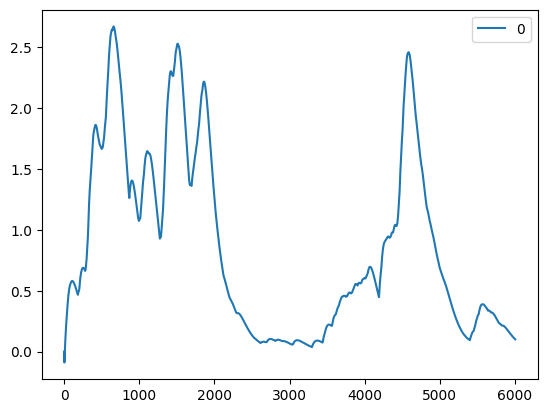

In [25]:
pd.DataFrame(r).plot()

     pcost       dcost       gap    pres   dres
 0: -3.0339e+03 -2.9683e+03  1e+04  1e+02  2e+01
 1: -3.0755e+03 -4.5006e+03  2e+03  2e+01  3e+00
 2: -3.0973e+03 -3.3378e+03  2e+02  2e+00  4e-01
 3: -3.1002e+03 -3.1482e+03  5e+01  3e-01  5e-02
 4: -3.1027e+03 -3.1103e+03  8e+00  2e-02  3e-03
 5: -3.1069e+03 -3.1084e+03  1e+00  2e-04  3e-05
 6: -3.1078e+03 -3.1082e+03  4e-01  2e-05  3e-06
 7: -3.1079e+03 -3.1081e+03  2e-01  4e-06  8e-07
 8: -3.1080e+03 -3.1081e+03  6e-02  1e-06  2e-07
 9: -3.1080e+03 -3.1081e+03  6e-02  7e-07  1e-07
10: -3.1081e+03 -3.1081e+03  2e-02  2e-07  3e-08
11: -3.1081e+03 -3.1081e+03  1e-02  9e-08  2e-08
12: -3.1081e+03 -3.1081e+03  4e-03  2e-08  5e-09
13: -3.1081e+03 -3.1081e+03  3e-03  2e-08  3e-09
14: -3.1081e+03 -3.1081e+03  9e-04  3e-09  6e-10
15: -3.1081e+03 -3.1081e+03  6e-04  2e-09  3e-10
16: -3.1081e+03 -3.1081e+03  2e-04  3e-10  6e-11
17: -3.1081e+03 -3.1081e+03  1e-04  2e-10  3e-11
18: -3.1081e+03 -3.1081e+03  3e-05  7e-11  1e-11
19: -3.1081e+03 -3.10

<AxesSubplot: >

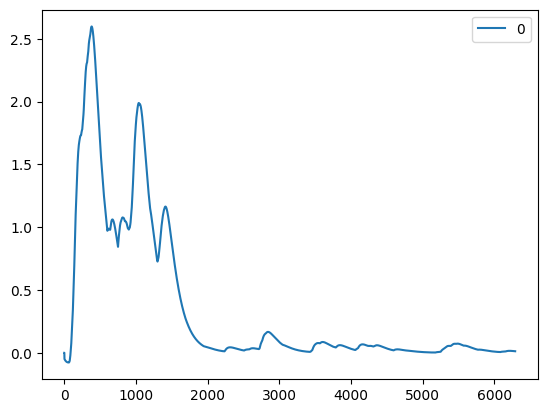

In [26]:
y = df_eda[calm_starts:calm_stops]
y = y.to_numpy()
yn = (y - y.mean()) / y.std()
Fs = 75.
[r, p, t, l, d, e, obj] = cvxEDA(yn, 1./Fs)
pd.DataFrame(r).plot()

     pcost       dcost       gap    pres   dres
 0: -2.9940e+03 -2.9549e+03  9e+03  9e+01  2e+01
 1: -3.0143e+03 -3.7733e+03  8e+02  9e+00  2e+00
 2: -3.0300e+03 -3.1043e+03  7e+01  6e-01  2e-01
 3: -3.0319e+03 -3.0434e+03  1e+01  7e-02  2e-02
 4: -3.0348e+03 -3.0373e+03  3e+00  7e-04  2e-04
 5: -3.0360e+03 -3.0369e+03  9e-01  2e-04  5e-05
 6: -3.0362e+03 -3.0368e+03  6e-01  8e-05  2e-05
 7: -3.0365e+03 -3.0366e+03  2e-01  2e-05  5e-06
 8: -3.0365e+03 -3.0366e+03  2e-01  1e-05  4e-06
 9: -3.0365e+03 -3.0366e+03  6e-02  4e-06  1e-06
10: -3.0366e+03 -3.0366e+03  4e-02  2e-06  5e-07
11: -3.0366e+03 -3.0366e+03  1e-02  5e-07  1e-07
12: -3.0366e+03 -3.0366e+03  5e-03  8e-08  2e-08
13: -3.0366e+03 -3.0366e+03  2e-03  1e-08  3e-09
14: -3.0366e+03 -3.0366e+03  6e-04  2e-10  6e-11
15: -3.0366e+03 -3.0366e+03  1e-04  5e-11  6e-11
16: -3.0366e+03 -3.0366e+03  2e-05  5e-11  8e-11
17: -3.0366e+03 -3.0366e+03  4e-06  5e-11  1e-10
18: -3.0366e+03 -3.0366e+03  5e-07  5e-11  9e-11
Optimal solution foun

<AxesSubplot: >

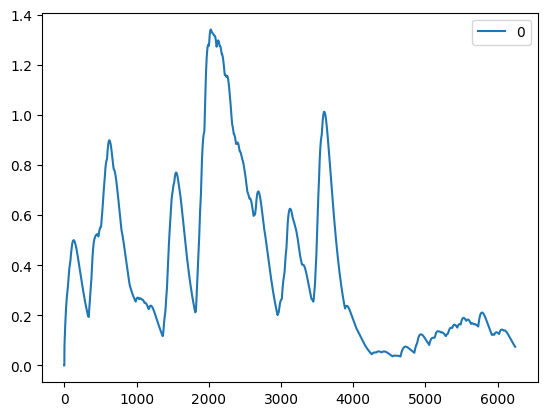

In [27]:
y = df_eda[baseline_starts2:baseline_stops2]
y = y.to_numpy()
yn = (y - y.mean()) / y.std()
Fs = 75.
[r, p, t, l, d, e, obj] = cvxEDA(yn, 1./Fs)
pd.DataFrame(r).plot()

In [28]:
from scipy import stats
y = df_eda[baseline_starts2:baseline_stops2]
y = y.to_numpy()
yn = zscore(y)node

SyntaxError: invalid syntax (1552622.py, line 4)

In [30]:
import numpy as np
import pandas as pd
from timeflux.core.node import Node
from timeflux.nodes.window import Slide
import numpy as np
import cvxopt as cv
import cvxopt.solvers
from scipy import stats

def cvxEDA(y, delta, tau0=2., tau1=0.7, delta_knot=10., alpha=8e-4, gamma=1e-2,
           solver=None, options={'reltol':1e-9}):
    """CVXEDA Convex optimization approach to electrodermal activity processing

    This function implements the cvxEDA algorithm described in "cvxEDA: a
    Convex Optimization Approach to Electrodermal Activity Processing"
    (http://dx.doi.org/10.1109/TBME.2015.2474131, also available from the
    authors' homepages).

    Arguments:
       y: observed EDA signal (we recommend normalizing it: y = zscore(y))
       delta: sampling interval (in seconds) of y
       tau0: slow time constant of the Bateman function
       tau1: fast time constant of the Bateman function
       delta_knot: time between knots of the tonic spline function
       alpha: penalization for the sparse SMNA driver
       gamma: penalization for the tonic spline coefficients
       solver: sparse QP solver to be used, see cvxopt.solvers.qp
       options: solver options, see:
                http://cvxopt.org/userguide/coneprog.html#algorithm-parameters

    Returns (see paper for details):
       r: phasic component
       p: sparse SMNA driver of phasic component
       t: tonic component
       l: coefficients of tonic spline
       d: offset and slope of the linear drift term
       e: model residuals
       obj: value of objective function being minimized (eq 15 of paper)
    """

    n = len(y)
    y = cv.matrix(y)

    # bateman ARMA model
    a1 = 1./min(tau1, tau0) # a1 > a0
    a0 = 1./max(tau1, tau0)
    ar = np.array([(a1*delta + 2.) * (a0*delta + 2.), 2.*a1*a0*delta**2 - 8.,
        (a1*delta - 2.) * (a0*delta - 2.)]) / ((a1 - a0) * delta**2)
    ma = np.array([1., 2., 1.])

    # matrices for ARMA model
    i = np.arange(2, n)
    A = cv.spmatrix(np.tile(ar, (n-2,1)), np.c_[i,i,i], np.c_[i,i-1,i-2], (n,n))
    M = cv.spmatrix(np.tile(ma, (n-2,1)), np.c_[i,i,i], np.c_[i,i-1,i-2], (n,n))

    # spline
    delta_knot_s = int(round(delta_knot / delta))
    spl = np.r_[np.arange(1.,delta_knot_s), np.arange(delta_knot_s, 0., -1.)] # order 1
    spl = np.convolve(spl, spl, 'full')
    spl /= max(spl)
    # matrix of spline regressors
    i = np.c_[np.arange(-(len(spl)//2), (len(spl)+1)//2)] + np.r_[np.arange(0, n, delta_knot_s)]
    nB = i.shape[1]
    j = np.tile(np.arange(nB), (len(spl),1))
    p = np.tile(spl, (nB,1)).T
    valid = (i >= 0) & (i < n)
    B = cv.spmatrix(p[valid], i[valid], j[valid])

    # trend
    C = cv.matrix(np.c_[np.ones(n), np.arange(1., n+1.)/n])
    nC = C.size[1]

    # Solve the problem:
    # .5*(M*q + B*l + C*d - y)^2 + alpha*sum(A,1)*p + .5*gamma*l'*l
    # s.t. A*q >= 0

    old_options = cv.solvers.options.copy()
    cv.solvers.options.clear()
    cv.solvers.options.update(options)
    if solver == 'conelp':
        # Use conelp
        z = lambda m,n: cv.spmatrix([],[],[],(m,n))
        G = cv.sparse([[-A,z(2,n),M,z(nB+2,n)],[z(n+2,nC),C,z(nB+2,nC)],
                    [z(n,1),-1,1,z(n+nB+2,1)],[z(2*n+2,1),-1,1,z(nB,1)],
                    [z(n+2,nB),B,z(2,nB),cv.spmatrix(1.0, range(nB), range(nB))]])
        h = cv.matrix([z(n,1),.5,.5,y,.5,.5,z(nB,1)])
        c = cv.matrix([(cv.matrix(alpha, (1,n)) * A).T,z(nC,1),1,gamma,z(nB,1)])
        res = cv.solvers.conelp(c, G, h, dims={'l':n,'q':[n+2,nB+2],'s':[]})
        obj = res['primal objective']
    else:
        # Use qp
        Mt, Ct, Bt = M.T, C.T, B.T
        H = cv.sparse([[Mt*M, Ct*M, Bt*M], [Mt*C, Ct*C, Bt*C],
                    [Mt*B, Ct*B, Bt*B+gamma*cv.spmatrix(1.0, range(nB), range(nB))]])
        f = cv.matrix([(cv.matrix(alpha, (1,n)) * A).T - Mt*y,  -(Ct*y), -(Bt*y)])
        res = cv.solvers.qp(H, f, cv.spmatrix(-A.V, A.I, A.J, (n,len(f))),
                            cv.matrix(0., (n,1)), solver=solver)
        obj = res['primal objective'] + .5 * (y.T * y)
    cv.solvers.options.clear()
    cv.solvers.options.update(old_options)

    l = res['x'][-nB:]
    d = res['x'][n:n+nC]
    t = B*l + C*d
    q = res['x'][:n]
    p = A * q
    r = M * q
    e = y - r - t

    return (np.array(a).ravel() for a in (r, p, t, l, d, e, obj))

class PhasicComponent(Slide):
    """Average the data on a rolling window
    Attributes:
        i (Port): Default input, expects DataFrame.
        o (Port): Default output, provides DataFrame and meta.

    Args:
        length (float): The length of the window, in seconds.
    """
    def __init__(self, length, step):

        super(self.__class__, self).__init__(length=length, step=step)
        self._columns = None

    def update(self):

        if not self.i.ready():
            return
        if self._columns is None:
            self._columns = self.i.data.columns

        # At this point, we are sure that we have some data to process
        super(self.__class__, self).update()

        # if the window output is ready, fit the scaler with its values
        for port_name, _, port in self.iterate("o*"):
      #  if self.o.ready():
            time = port.data.index[-1]
            print(port.data)
            Fs = 75.
            [r, p, t, l, d, e, obj] = cvxEDA(port.data.values, 1./Fs)
            port.data = pd.DataFrame(
                r[-1].reshape(1, -1),
                index=[time],
                columns=self._columns,
            )
            print(port.data)

In [43]:
node = PhasicComponent(5., 0.5)

node.i.data = df_eda[calm_starts:calm_stops]
node.i.meta["rate"] = 100.

node.update()

                               A1_EDA
2022-10-29 18:42:31.049335  14.501953
2022-10-29 18:42:31.059335  14.282227
2022-10-29 18:42:31.069335  14.477539
2022-10-29 18:42:31.079335  14.257812
2022-10-29 18:42:31.089335  14.477539
...                               ...
2022-10-29 18:42:35.999335  14.794922
2022-10-29 18:42:36.009335  15.063477
2022-10-29 18:42:36.019335  14.794922
2022-10-29 18:42:36.029335  15.039062
2022-10-29 18:42:36.039335  14.746094

[500 rows x 1 columns]
     pcost       dcost       gap    pres   dres
 0: -5.6593e+04 -5.6593e+04  5e+02  2e+01  5e+00
 1: -5.6593e+04 -5.6612e+04  2e+01  9e-01  2e-01
 2: -5.6594e+04 -5.6599e+04  5e+00  2e-01  4e-02
 3: -5.6595e+04 -5.6596e+04  1e+00  2e-02  4e-03
 4: -5.6595e+04 -5.6595e+04  1e-01  1e-03  2e-04
 5: -5.6595e+04 -5.6595e+04  3e-02  1e-04  2e-05
 6: -5.6595e+04 -5.6595e+04  5e-03  2e-05  3e-06
 7: -5.6595e+04 -5.6595e+04  3e-03  7e-06  1e-06
 8: -5.6595e+04 -5.6595e+04  9e-04  1e-06  3e-07
 9: -5.6595e+04 -5.6595e+04  3e

     pcost       dcost       gap    pres   dres
 0: -5.3348e+04 -5.3347e+04  5e+02  2e+01  5e+00
 1: -5.3347e+04 -5.3357e+04  1e+01  4e-01  9e-02
 2: -5.3348e+04 -5.3350e+04  2e+00  8e-02  2e-02
 3: -5.3348e+04 -5.3349e+04  5e-01  1e-02  2e-03
 4: -5.3348e+04 -5.3348e+04  8e-02  1e-03  2e-04
 5: -5.3348e+04 -5.3348e+04  6e-02  5e-04  1e-04
 6: -5.3348e+04 -5.3348e+04  1e-02  1e-04  2e-05
 7: -5.3348e+04 -5.3348e+04  7e-03  3e-05  7e-06
 8: -5.3348e+04 -5.3348e+04  2e-03  7e-06  1e-06
 9: -5.3348e+04 -5.3348e+04  6e-04  9e-07  2e-07
10: -5.3348e+04 -5.3348e+04  1e-04  8e-08  2e-08
11: -5.3348e+04 -5.3348e+04  4e-05  5e-09  1e-09
Optimal solution found.
                              A1_EDA
2022-10-29 18:42:40.039335  0.795916
                               A1_EDA
2022-10-29 18:42:35.549335  15.380859
2022-10-29 18:42:35.559335  15.136719
2022-10-29 18:42:35.569335  15.380859
2022-10-29 18:42:35.579335  15.112305
2022-10-29 18:42:35.589335  15.356445
...                               ...


     pcost       dcost       gap    pres   dres
 0: -5.4024e+04 -5.4024e+04  5e+02  2e+01  5e+00
 1: -5.4024e+04 -5.4045e+04  2e+01  9e-01  2e-01
 2: -5.4026e+04 -5.4029e+04  3e+00  8e-02  2e-02
 3: -5.4026e+04 -5.4027e+04  4e-01  8e-04  2e-04
 4: -5.4027e+04 -5.4027e+04  6e-02  1e-04  2e-05
 5: -5.4027e+04 -5.4027e+04  1e-02  2e-05  4e-06
 6: -5.4027e+04 -5.4027e+04  9e-03  7e-06  2e-06
 7: -5.4027e+04 -5.4027e+04  2e-03  1e-06  3e-07
 8: -5.4027e+04 -5.4027e+04  8e-04  2e-07  4e-08
 9: -5.4027e+04 -5.4027e+04  2e-04  3e-08  5e-09
10: -5.4027e+04 -5.4027e+04  3e-05  4e-10  8e-11
Optimal solution found.
                              A1_EDA
2022-10-29 18:42:44.539335  0.426774
                               A1_EDA
2022-10-29 18:42:40.049335  14.331055
2022-10-29 18:42:40.059335  14.404297
2022-10-29 18:42:40.069335  14.331055
2022-10-29 18:42:40.079335  14.404297
2022-10-29 18:42:40.089335  14.331055
...                               ...
2022-10-29 18:42:44.999335  14.892578
2022-10-29 

     pcost       dcost       gap    pres   dres
 0: -5.3010e+04 -5.3009e+04  5e+02  2e+01  5e+00
 1: -5.3009e+04 -5.3015e+04  6e+00  3e-01  5e-02
 2: -5.3009e+04 -5.3010e+04  6e-01  1e-02  2e-03
 3: -5.3010e+04 -5.3010e+04  5e-02  1e-04  2e-05
 4: -5.3010e+04 -5.3010e+04  1e-02  2e-05  4e-06
 5: -5.3010e+04 -5.3010e+04  4e-03  3e-06  7e-07
 6: -5.3010e+04 -5.3010e+04  3e-03  2e-06  3e-07
 7: -5.3010e+04 -5.3010e+04  2e-04  8e-08  2e-08
 8: -5.3010e+04 -5.3010e+04  4e-05  1e-08  3e-09
Optimal solution found.
                              A1_EDA
2022-10-29 18:42:49.539335  0.033933
                               A1_EDA
2022-10-29 18:42:45.049335  14.746094
2022-10-29 18:42:45.059335  14.916992
2022-10-29 18:42:45.069335  14.746094
2022-10-29 18:42:45.079335  14.916992
2022-10-29 18:42:45.089335  14.746094
...                               ...
2022-10-29 18:42:49.999335  14.282227
2022-10-29 18:42:50.009335  14.257812
2022-10-29 18:42:50.019335  14.306641
2022-10-29 18:42:50.029335  14.25

     pcost       dcost       gap    pres   dres
 0: -5.0054e+04 -5.0053e+04  5e+02  2e+01  5e+00
 1: -5.0053e+04 -5.0060e+04  7e+00  3e-01  6e-02
 2: -5.0053e+04 -5.0054e+04  5e-01  5e-03  1e-03
 3: -5.0054e+04 -5.0054e+04  8e-02  8e-04  2e-04
 4: -5.0054e+04 -5.0054e+04  4e-02  8e-06  2e-06
 5: -5.0054e+04 -5.0054e+04  3e-03  6e-07  1e-07
 6: -5.0054e+04 -5.0054e+04  7e-04  1e-07  3e-08
 7: -5.0054e+04 -5.0054e+04  3e-04  5e-09  1e-09
 8: -5.0054e+04 -5.0054e+04  2e-05  2e-10  5e-11
Optimal solution found.
                              A1_EDA
2022-10-29 18:42:55.539335  0.011636
                               A1_EDA
2022-10-29 18:42:51.049335  14.233398
2022-10-29 18:42:51.059335  14.233398
2022-10-29 18:42:51.069335  14.233398
2022-10-29 18:42:51.079335  14.233398
2022-10-29 18:42:51.089335  14.233398
...                               ...
2022-10-29 18:42:55.999335  13.964844
2022-10-29 18:42:56.009335  14.111328
2022-10-29 18:42:56.019335  13.964844
2022-10-29 18:42:56.029335  14.11

10: -4.9204e+04 -4.9204e+04  2e-05  3e-11  7e-12
Optimal solution found.
                              A1_EDA
2022-10-29 18:43:00.039335  0.042499
                               A1_EDA
2022-10-29 18:42:55.549335  14.135742
2022-10-29 18:42:55.559335  13.989258
2022-10-29 18:42:55.569335  14.111328
2022-10-29 18:42:55.579335  13.989258
2022-10-29 18:42:55.589335  14.111328
...                               ...
2022-10-29 18:43:00.499335  13.916016
2022-10-29 18:43:00.509335  14.038086
2022-10-29 18:43:00.519335  13.916016
2022-10-29 18:43:00.529335  14.038086
2022-10-29 18:43:00.539335  13.916016

[500 rows x 1 columns]
     pcost       dcost       gap    pres   dres
 0: -4.9151e+04 -4.9150e+04  5e+02  2e+01  5e+00
 1: -4.9150e+04 -4.9159e+04  9e+00  4e-01  8e-02
 2: -4.9150e+04 -4.9151e+04  5e-01  5e-03  1e-03
 3: -4.9150e+04 -4.9151e+04  1e-01  9e-04  2e-04
 4: -4.9151e+04 -4.9151e+04  5e-02  9e-06  2e-06
 5: -4.9151e+04 -4.9151e+04  5e-03  9e-07  2e-07
 6: -4.9151e+04 -4.9151e+04  1e

     pcost       dcost       gap    pres   dres
 0: -4.7971e+04 -4.7971e+04  5e+02  2e+01  5e+00
 1: -4.7971e+04 -4.7978e+04  7e+00  3e-01  6e-02
 2: -4.7971e+04 -4.7972e+04  6e-01  1e-02  2e-03
 3: -4.7971e+04 -4.7971e+04  6e-02  1e-04  2e-05
 4: -4.7971e+04 -4.7971e+04  8e-03  1e-06  2e-07
 5: -4.7971e+04 -4.7971e+04  1e-03  1e-08  2e-09
 6: -4.7971e+04 -4.7971e+04  2e-04  1e-10  2e-11
 7: -4.7971e+04 -4.7971e+04  4e-05  1e-11  3e-12
Optimal solution found.
                              A1_EDA
2022-10-29 18:43:06.039335  0.025575
                               A1_EDA
2022-10-29 18:43:01.549335  13.964844
2022-10-29 18:43:01.559335  13.867187
2022-10-29 18:43:01.569335  13.989258
2022-10-29 18:43:01.579335  13.867187
2022-10-29 18:43:01.589335  13.964844
...                               ...
2022-10-29 18:43:06.499335  13.818359
2022-10-29 18:43:06.509335  13.769531
2022-10-29 18:43:06.519335  13.818359
2022-10-29 18:43:06.529335  13.769531
2022-10-29 18:43:06.539335  13.818359

[500 

     pcost       dcost       gap    pres   dres
 0: -4.7111e+04 -4.7111e+04  5e+02  2e+01  5e+00
 1: -4.7111e+04 -4.7117e+04  7e+00  3e-01  6e-02
 2: -4.7111e+04 -4.7111e+04  5e-01  3e-03  6e-04
 3: -4.7111e+04 -4.7111e+04  1e-01  6e-04  1e-04
 4: -4.7111e+04 -4.7111e+04  4e-02  6e-06  1e-06
 5: -4.7111e+04 -4.7111e+04  4e-03  6e-07  1e-07
 6: -4.7111e+04 -4.7111e+04  8e-04  1e-07  2e-08
 7: -4.7111e+04 -4.7111e+04  2e-04  1e-09  2e-10
 8: -4.7111e+04 -4.7111e+04  2e-05  1e-10  3e-11
Optimal solution found.
                              A1_EDA
2022-10-29 18:43:11.539335  0.011609
                               A1_EDA
2022-10-29 18:43:07.049335  13.769531
2022-10-29 18:43:07.059335  13.818359
2022-10-29 18:43:07.069335  13.769531
2022-10-29 18:43:07.079335  13.818359
2022-10-29 18:43:07.089335  13.769531
...                               ...
2022-10-29 18:43:11.999335  13.720703
2022-10-29 18:43:12.009335  13.574219
2022-10-29 18:43:12.019335  13.720703
2022-10-29 18:43:12.029335  13.57

 7: -4.6216e+04 -4.6216e+04  3e-04  2e-08  5e-09
 8: -4.6216e+04 -4.6216e+04  8e-05  5e-09  1e-09
 9: -4.6216e+04 -4.6216e+04  5e-05  2e-09  4e-10
10: -4.6216e+04 -4.6216e+04  3e-06  7e-11  2e-11
Optimal solution found.
                              A1_EDA
2022-10-29 18:43:17.039335  0.005596
                               A1_EDA
2022-10-29 18:43:12.549335  13.574219
2022-10-29 18:43:12.559335  13.720703
2022-10-29 18:43:12.569335  13.574219
2022-10-29 18:43:12.579335  13.745117
2022-10-29 18:43:12.589335  13.574219
...                               ...
2022-10-29 18:43:17.499335  13.574219
2022-10-29 18:43:17.509335  13.452148
2022-10-29 18:43:17.519335  13.549805
2022-10-29 18:43:17.529335  13.452148
2022-10-29 18:43:17.539335  13.574219

[500 rows x 1 columns]
     pcost       dcost       gap    pres   dres
 0: -4.6118e+04 -4.6118e+04  5e+02  2e+01  5e+00
 1: -4.6118e+04 -4.6124e+04  6e+00  2e-01  6e-02
 2: -4.6118e+04 -4.6119e+04  5e-01  5e-03  1e-03
 3: -4.6118e+04 -4.6118e+04  6e

 1: -4.4812e+04 -4.4818e+04  6e+00  2e-01  6e-02
 2: -4.4812e+04 -4.4812e+04  5e-01  3e-03  8e-04
 3: -4.4812e+04 -4.4812e+04  8e-02  6e-04  1e-04
 4: -4.4812e+04 -4.4812e+04  3e-02  1e-04  3e-05
 5: -4.4812e+04 -4.4812e+04  3e-03  1e-05  2e-06
 6: -4.4812e+04 -4.4812e+04  4e-04  3e-07  6e-08
 7: -4.4812e+04 -4.4812e+04  3e-05  3e-09  6e-10
Optimal solution found.
                              A1_EDA
2022-10-29 18:43:23.539335  0.001264
                               A1_EDA
2022-10-29 18:43:19.049335  13.427734
2022-10-29 18:43:19.059335  13.476562
2022-10-29 18:43:19.069335  13.427734
2022-10-29 18:43:19.079335  13.476562
2022-10-29 18:43:19.089335  13.427734
...                               ...
2022-10-29 18:43:23.999335  13.281250
2022-10-29 18:43:24.009335  13.354492
2022-10-29 18:43:24.019335  13.281250
2022-10-29 18:43:24.029335  13.354492
2022-10-29 18:43:24.039335  13.281250

[500 rows x 1 columns]
     pcost       dcost       gap    pres   dres
 0: -4.4716e+04 -4.4715e+04  5e

     pcost       dcost       gap    pres   dres
 0: -4.3786e+04 -4.3785e+04  5e+02  2e+01  5e+00
 1: -4.3785e+04 -4.3791e+04  6e+00  3e-01  6e-02
 2: -4.3785e+04 -4.3786e+04  4e-01  3e-03  6e-04
 3: -4.3785e+04 -4.3786e+04  1e-01  7e-04  2e-04
 4: -4.3785e+04 -4.3786e+04  4e-02  7e-06  2e-06
 5: -4.3786e+04 -4.3786e+04  4e-03  5e-07  1e-07
 6: -4.3786e+04 -4.3786e+04  3e-04  7e-09  2e-09
 7: -4.3786e+04 -4.3786e+04  4e-06  7e-11  2e-11
Optimal solution found.
                              A1_EDA
2022-10-29 18:43:30.039335  0.001193
                               A1_EDA
2022-10-29 18:43:25.549335  13.354492
2022-10-29 18:43:25.559335  13.232422
2022-10-29 18:43:25.569335  13.354492
2022-10-29 18:43:25.579335  13.256836
2022-10-29 18:43:25.589335  13.354492
...                               ...
2022-10-29 18:43:30.499335  13.037109
2022-10-29 18:43:30.509335  13.232422
2022-10-29 18:43:30.519335  13.012695
2022-10-29 18:43:30.529335  13.232422
2022-10-29 18:43:30.539335  13.037109

[500 

In [44]:
output = pd.concat([port.data for port_name, _, port in node.iterate("o*") ])

<AxesSubplot: >

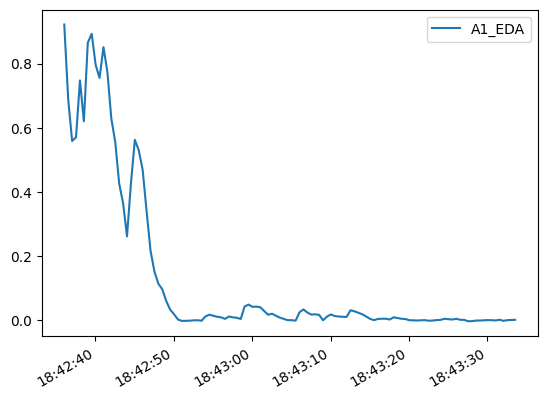

In [45]:
output.plot()
